# Kabaddi

Introduction/How to Play
-----------

Kabaddi is simple: two teams of seven players each face off in a large square arena for two halves of twenty minutes each. Players from each team take turns running across the center line to the other team's half of the court, tagging members of the other team, and running back. The more opposing team members they tag, the more points they score, but if the opposing team can physically prevent them from crossing back to their side of the court, they score no points

### Interesting Facts about Kabaddi and the Pro Kabaddi League:

There have been three kabaddi world cups so far (the fourth one will be held this year), and India won the title all three times in the men’s category. Interestingly, Iran was the runner-up in all the three world cups.

The Indian women’s kabaddi team also won all the three world cups organised so far.

## ProKabaddi League:-

Introduction:-
------ 

Pro Kabaddi League is a professional-level kabaddi league that started in 2014. Currently, the League is in its 7th season, which started on 20 July 2019 with the first match between U Mumba and Telugu Titans. The final match will be played on 19 October 2019.


#### Import Libraries

In [227]:
#data preprocessing
import pandas as pd
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC
#displayd data
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
import os
from scipy.stats import poisson,skellam


from sklearn.preprocessing import Imputer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

## Data Understanding and Preparation

In [228]:
# Fetch data from the Scraped Data from Prokabaddi.com
# to check web scraping the data in python 
# check PlayerDetails_Scraping.ipynb,TeamDetailsScraping.ipynb,TeamMembers_scraping.ipynb

teamDetails = pd.read_csv('teamDetails.csv',encoding='ISO-8859-1')
playerDetails = pd.read_csv('playerDetails.csv',encoding='ISO-8859-1')
teamMembers = pd.read_csv('teamMembers.csv',encoding='ISO-8859-1')

In [229]:
teamDetails.head()

,TeamName,MatchesPlayed,Rank,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted
0,Bengal Warriors,18,1.0,636,620,30.70,299,374,20.78,11.72,70,15,31,189,211,27,29
1,Bengaluru Bulls,17,2.0,582,609,30.55,278,351,20.65,11.28,64,12,25,173,203,26,26
2,Puneri Paltan,18,3.0,578,572,30.00,276,329,20.56,10.59,64,11,22,167,180,21,26
3,Dabang Delhi K.C.,16,4.0,567,559,29.81,254,314,19.50,10.53,63,7,22,166,179,21,24
4,Patna Pirates,17,4.0,567,559,29.00,250,313,18.47,10.50,60,7,21,160,176,21,22


In [230]:
playerDetails.head()

,PlayerName,MatchesPlayed,Rank,PlayerProfile,TotalPoints,SuccessfulRaidPoints,RaidPoints,SuccessfulTackles,TacklePoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Super10s,High5s
0,Pawan Kumar Sehrawat,17,1.0,Raider,228,168.0,217.0,58.0,61.0,12.76,3.63,38.0,10.0,9.0,15.0,6.0
1,Pardeep Narwal,17,2.0,Raider,207,165.0,207.0,54.0,58.0,12.31,3.41,30.0,6.0,7.0,11.0,5.0
2,Naveen Kumar,16,3.0,Raider,199,161.0,197.0,52.0,58.0,12.18,3.39,27.0,5.0,7.0,11.0,5.0
3,Maninder Singh,18,4.0,Raider,175,148.0,175.0,49.0,55.0,9.72,3.24,27.0,5.0,7.0,8.0,5.0
4,Siddharth Sirish Desai,16,5.0,Raider,140,117.0,137.0,48.0,53.0,9.62,3.17,24.0,5.0,7.0,7.0,5.0


In [231]:
teamMembers.head()

,PlayerName,TeamName
0,Maninder Singh,Bengal Warriors
1,K. Prapanjan,Bengal Warriors
2,Mohammad Taghi,Bengal Warriors
3,Rakesh Narwal,Bengal Warriors
4,Ravindra Ramesh,Bengal Warriors


In [232]:
teamMembers.shape

(221, 2)

In [233]:
teamMembers.isnull().sum(axis=0)

PlayerName    43
TeamName       0
dtype: int64

In [234]:
teamMembers=teamMembers[~teamMembers.PlayerName.isnull()]

In [235]:
teamMembers.shape

(178, 2)

In [236]:
teamDetails.shape

(12, 17)

In [237]:
teamDetails=teamDetails[~teamDetails.TeamName.isnull()]

In [238]:
teamDetails.shape

(12, 17)

In [239]:
teamDetails.isnull().sum(axis=0)

TeamName               0
MatchesPlayed          0
Rank                   0
TotalPointsScored      0
TotalPointsConceded    0
AverageScorePoints     0
SuccessfulRaids        0
RaidPoints             0
AverageRaidPoints      0
AverageTacklePoints    0
DODRaidPoints          0
SuperRaids             0
SuperTackles           0
Successfultackles      0
TacklePoints           0
AllOutsConceded        0
AllOutsInflicted       0
dtype: int64

In [240]:
playerDetails=playerDetails[~playerDetails.PlayerName.isnull()]

In [241]:
playerDetails.shape

(165, 16)

### Data Exploratory Analysis

In [242]:
display(teamDetails.head())

,TeamName,MatchesPlayed,Rank,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted
0,Bengal Warriors,18,1.0,636,620,30.70,299,374,20.78,11.72,70,15,31,189,211,27,29
1,Bengaluru Bulls,17,2.0,582,609,30.55,278,351,20.65,11.28,64,12,25,173,203,26,26
2,Puneri Paltan,18,3.0,578,572,30.00,276,329,20.56,10.59,64,11,22,167,180,21,26
3,Dabang Delhi K.C.,16,4.0,567,559,29.81,254,314,19.50,10.53,63,7,22,166,179,21,24
4,Patna Pirates,17,4.0,567,559,29.00,250,313,18.47,10.50,60,7,21,160,176,21,22


### Task 1-5

Predict the winner of the tournament

Predict the the top team in the points table after the completion of league matches

Predict the team with the highest points for successful raids

Predict the team with the highest points for successful tackles

Predict the team with the highest super-performance total

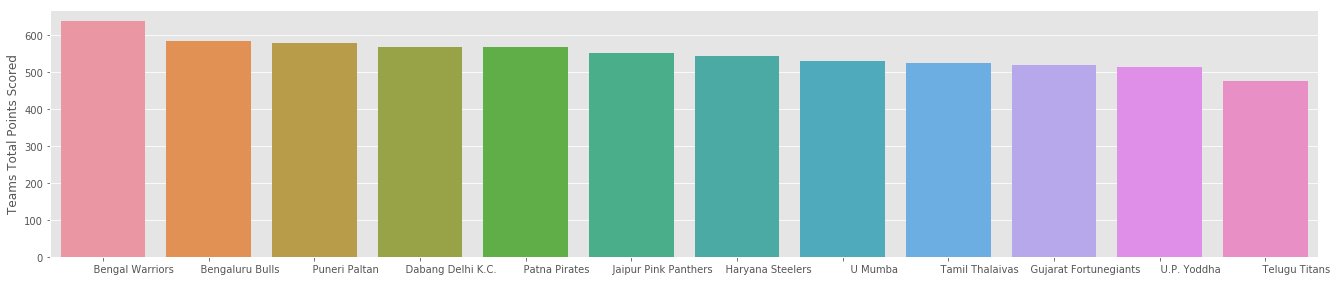

In [243]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['TotalPointsScored'].values)
a.set_ylabel('Teams Total Points Scored')
plt.show()

### Above Plot shows that Top five Teams on the basis of total Points Scored:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

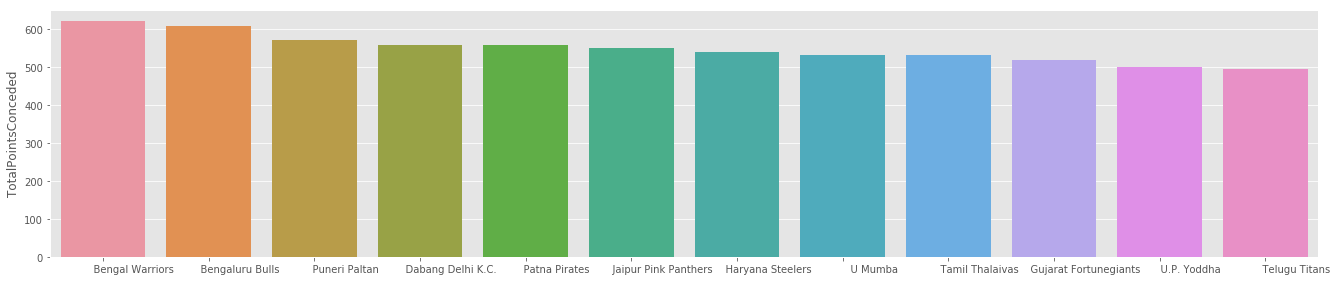

In [244]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['TotalPointsConceded'].values)
a.set_ylabel('TotalPointsConceded')
plt.show()

### Above Plot shows that Top five Teams on the basis of total Points Conceded:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

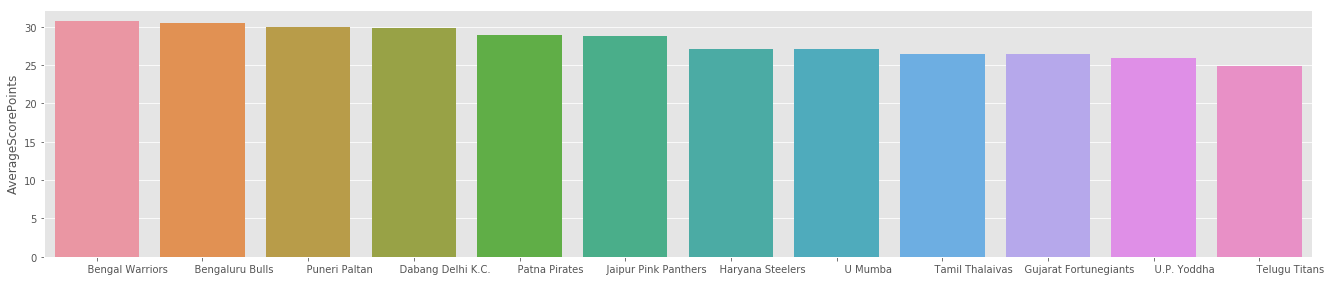

In [245]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['AverageScorePoints'].values)
a.set_ylabel('AverageScorePoints')
plt.show()

### Above Plot shows that Top five Teams on the basis of Average score Points:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

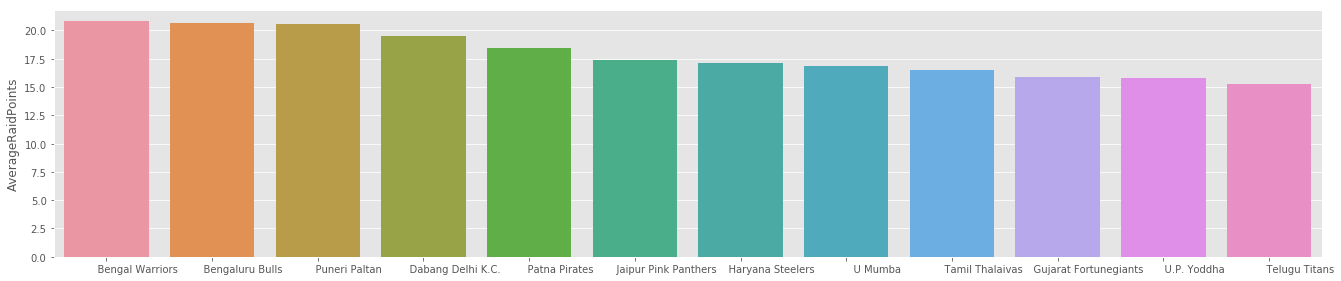

In [246]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['AverageRaidPoints'].values)
a.set_ylabel('AverageRaidPoints')
plt.show()

### Above Plot shows that Top five Teams on the basis of average Raid Points:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

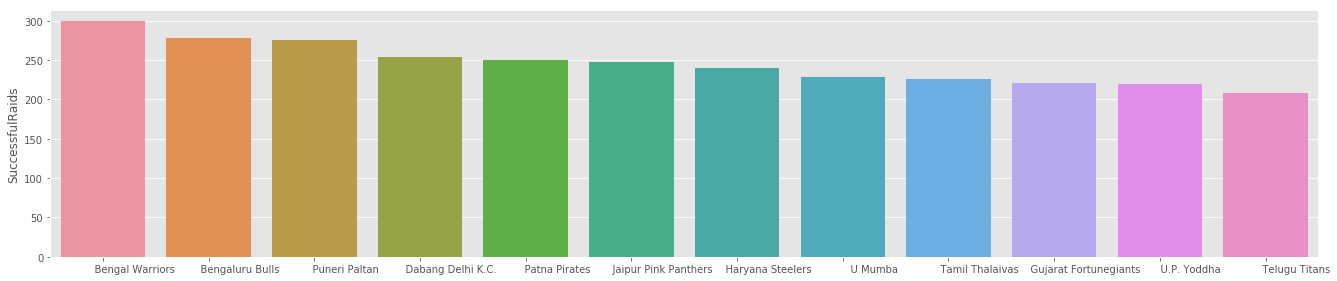

In [247]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['SuccessfulRaids'].values)
a.set_ylabel('SuccessfulRaids')
plt.show()

### Plot shows that Top five Teams on the basis of Successful Raids:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

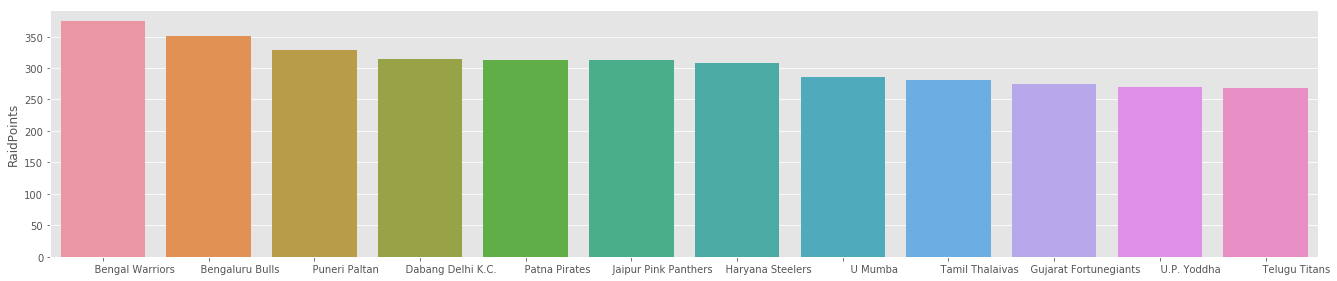

In [248]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['RaidPoints'].values)
a.set_ylabel('RaidPoints')
plt.show()

### Above Plot shows that Top five Teams on the basis of Raid Points:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

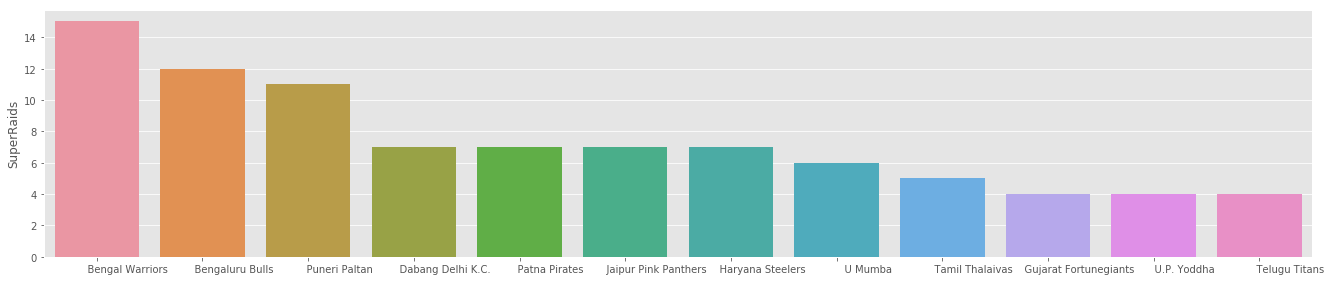

In [249]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['SuperRaids'].values)
a.set_ylabel('SuperRaids')
plt.show()

### Above Plot shows that Top five Teams on the basis of Super Raids:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

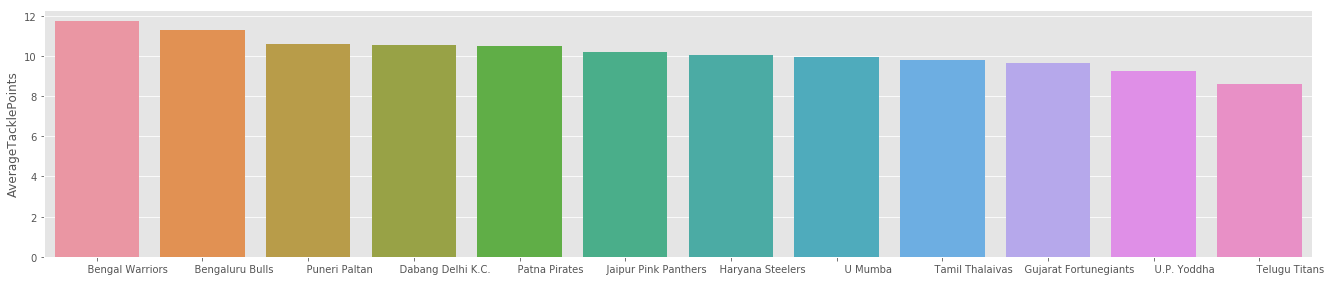

In [250]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['AverageTacklePoints'].values)
a.set_ylabel('AverageTacklePoints')
plt.show()

### Above Plot shows that Top five Teams on the basis of Average Tackle Points:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

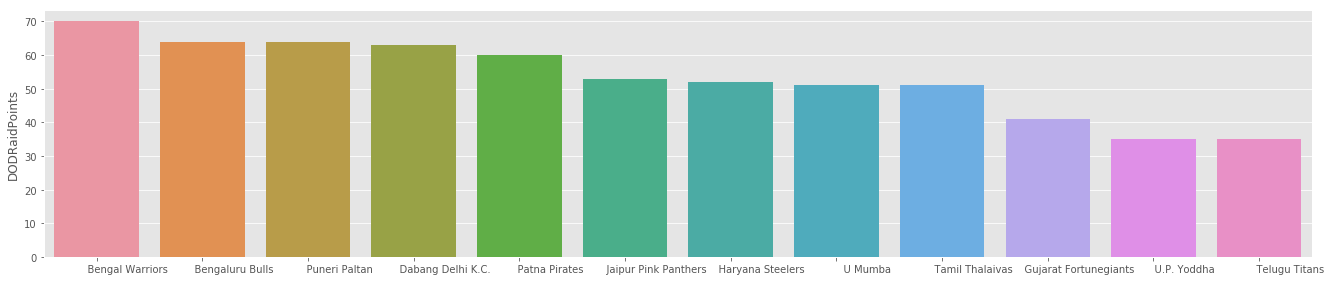

In [251]:
#DODRaidPoints
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['DODRaidPoints'].values)
a.set_ylabel('DODRaidPoints')
plt.show()

### Above Plot shows that Top five Teams on the basis of Do or Die Raid Points:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

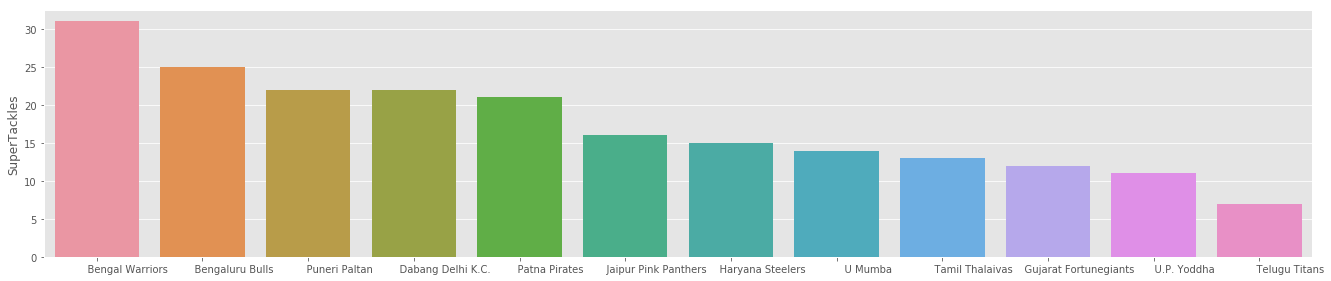

In [252]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['SuperTackles'].values)
a.set_ylabel('SuperTackles')
plt.show()

### Above Plot shows that Top five Teams on the basis of Super tackles:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

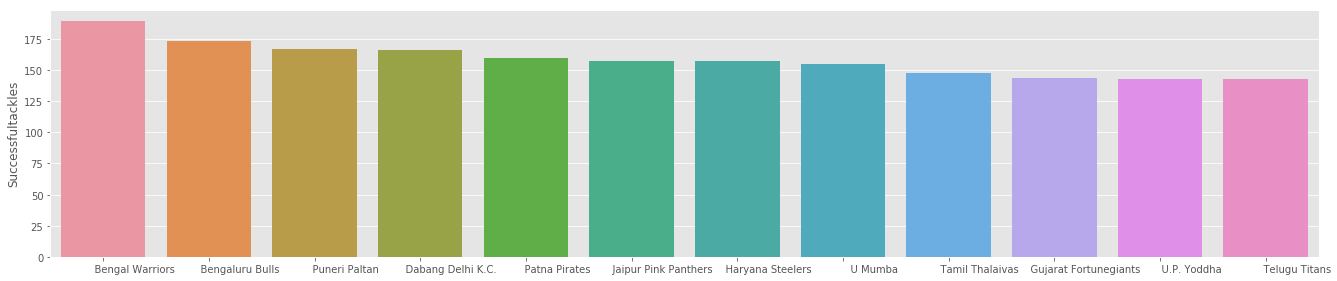

In [253]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['Successfultackles'].values)
a.set_ylabel('Successfultackles')
plt.show()

### Above Plot shows that Top five Teams on the basis of Successful Tackles:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

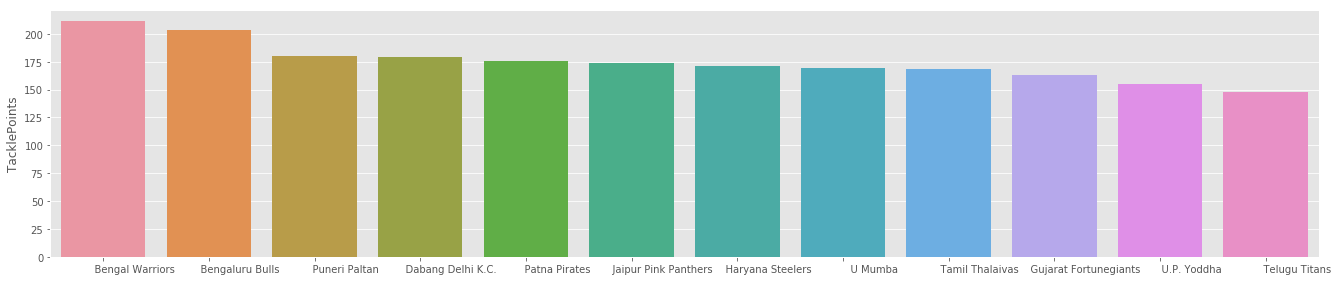

In [254]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['TacklePoints'].values)
a.set_ylabel('TacklePoints')
plt.show()

### Plot shows that Top five Teams on the basis of Tackle Points:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

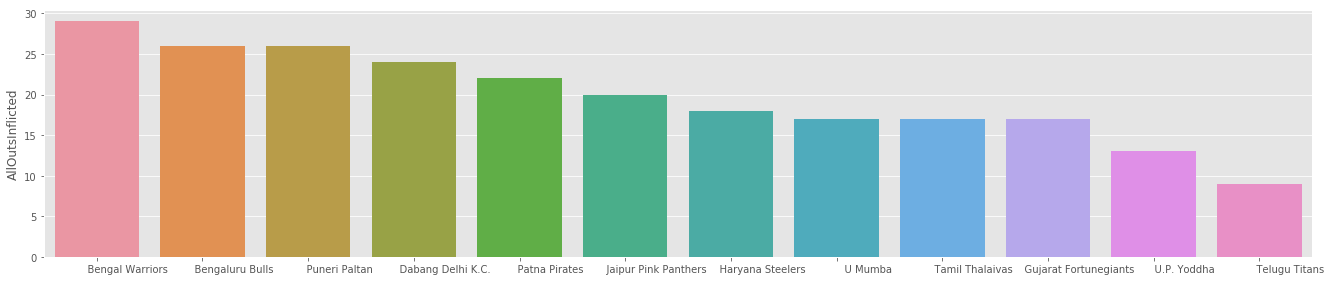

In [255]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=teamDetails['TeamName'].values, y=teamDetails['AllOutsInflicted'].values)
a.set_ylabel('AllOutsInflicted')
plt.show()

### Plot shows that Top five Teams on the basis of all outs Inflicted:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

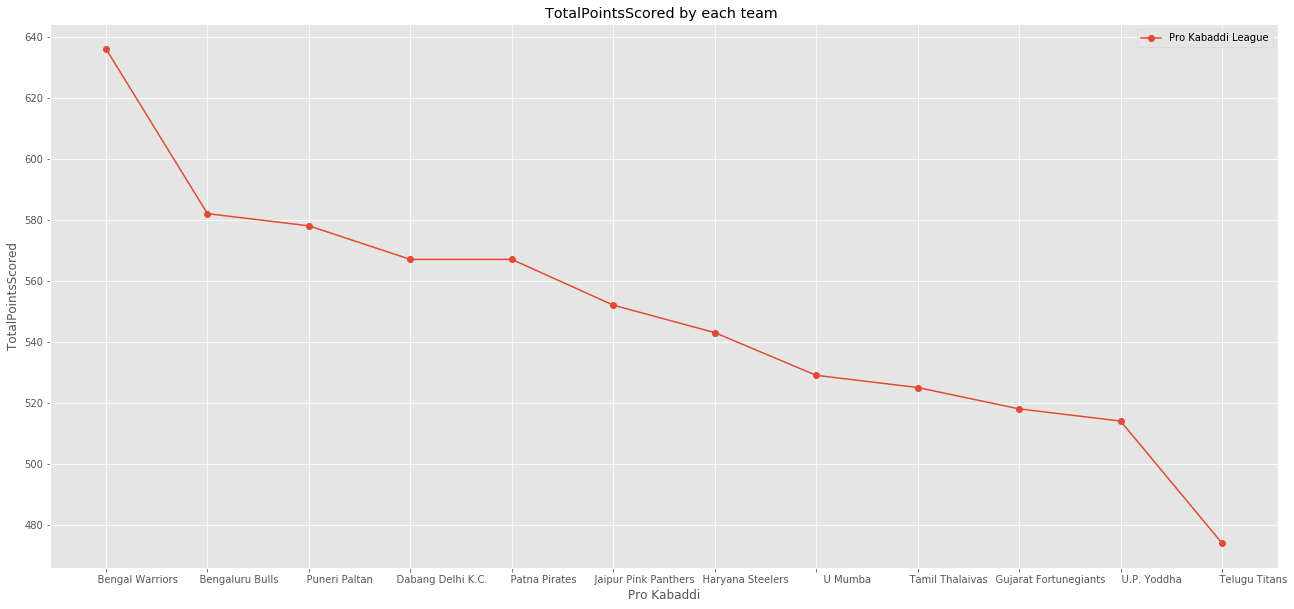

In [256]:
#Plotting total scored  points 
fig = plt.figure(figsize=(22, 10))
plt.title("TotalPointsScored by each team ")
plt.xticks(range(len(teamDetails)),teamDetails.TeamName)
plt.style.use('ggplot')
plt.xlabel("Pro Kabaddi")
plt.ylabel("TotalPointsScored")
num_Of_teams = range(len(teamDetails))
plt.plot(num_Of_teams,teamDetails.TotalPointsScored.values,label = "Pro Kabaddi League", marker = 'o')
plt.legend()

### Above Plot shows that Top five Teams on the basis of Total Points scored:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

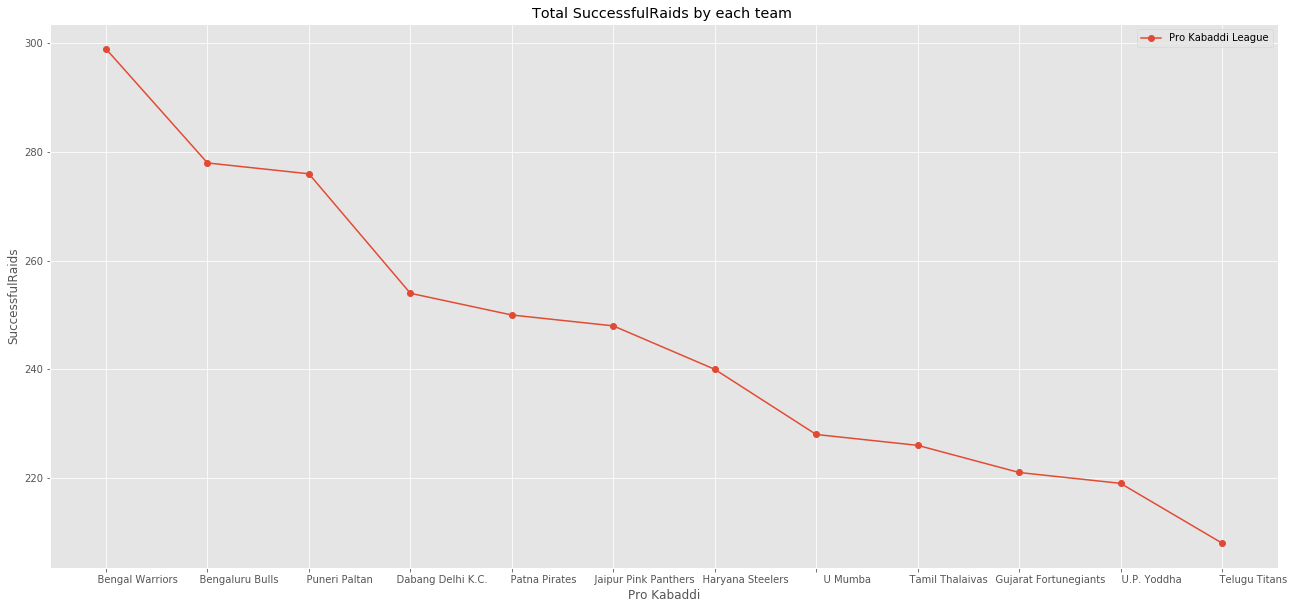

In [257]:
#Plotting  SuccessfulRaids scored 
fig = plt.figure(figsize=(22, 10))
plt.title("Total SuccessfulRaids by each team ")
plt.xticks(range(len(teamDetails)),teamDetails.TeamName)
plt.style.use('ggplot')
plt.xlabel("Pro Kabaddi")
plt.ylabel("SuccessfulRaids")
num_Of_teams = range(len(teamDetails))
plt.plot(num_Of_teams,teamDetails.SuccessfulRaids.values,label = "Pro Kabaddi League", marker = 'o')
plt.legend()

### Above Plot shows that Top five Teams on the basis of Succesful Raids:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

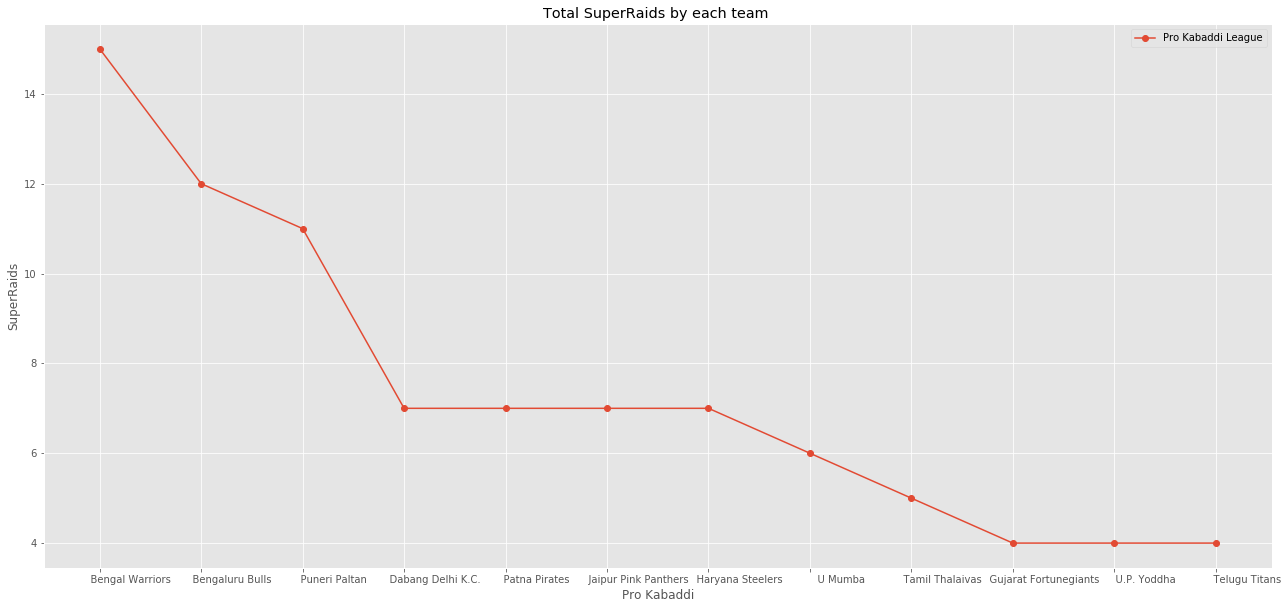

In [258]:
#Plotting SuperRaids scored 
fig = plt.figure(figsize=(22, 10))
plt.title("Total SuperRaids by each team ")
plt.xticks(range(len(teamDetails)),teamDetails.TeamName)
plt.style.use('ggplot')
plt.xlabel("Pro Kabaddi")
plt.ylabel("SuperRaids")
num_Of_teams = range(len(teamDetails))
plt.plot(num_Of_teams,teamDetails.SuperRaids.values,label = "Pro Kabaddi League", marker = 'o')
plt.legend()

### Above Plot shows that Top five Teams on the basis of Super Raids:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

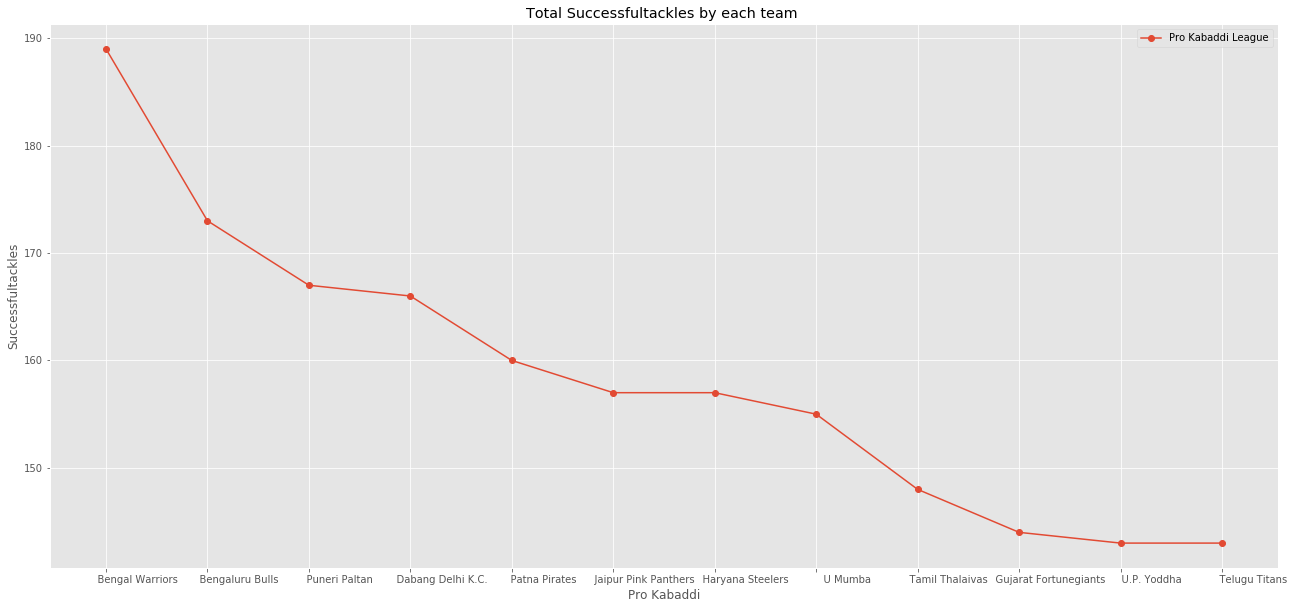

In [259]:
#Plotting Successfultackles  scored 
fig = plt.figure(figsize=(22, 10))
plt.title("Total Successfultackles by each team ")
plt.xticks(range(len(teamDetails)),teamDetails.TeamName)
plt.style.use('ggplot')
plt.xlabel("Pro Kabaddi")
plt.ylabel("Successfultackles")
num_Of_teams = range(len(teamDetails))
plt.plot(num_Of_teams,teamDetails.Successfultackles.values,label = "Pro Kabaddi League", marker = 'o')
plt.legend()

### Above Plot shows that Top five Teams on the basis of Succesful Tackles:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

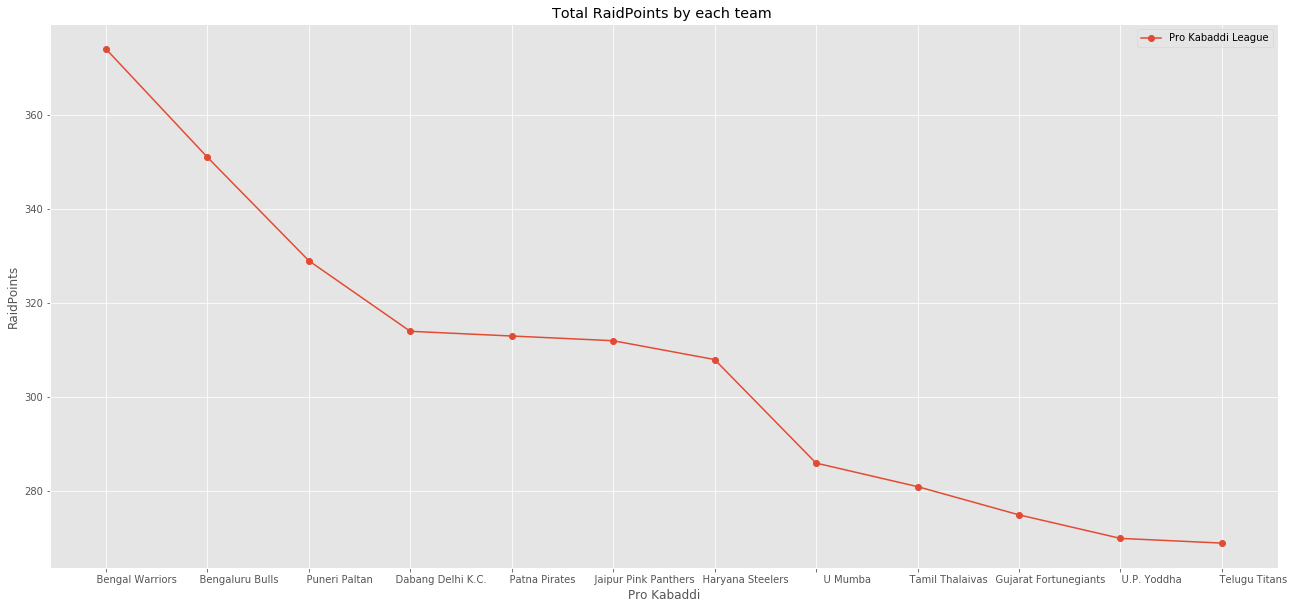

In [260]:
#Plotting RaidPoints scored 
fig = plt.figure(figsize=(22, 10))
plt.title("Total RaidPoints by each team ")
plt.xticks(range(len(teamDetails)),teamDetails.TeamName)
plt.style.use('ggplot')
plt.xlabel("Pro Kabaddi")
plt.ylabel("RaidPoints")
num_Of_teams = range(len(teamDetails))
plt.plot(num_Of_teams,teamDetails.RaidPoints.values,label = "Pro Kabaddi League", marker = 'o')
plt.legend()

### Above Plot shows that Top five Teams on the basis of Raidm Points:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

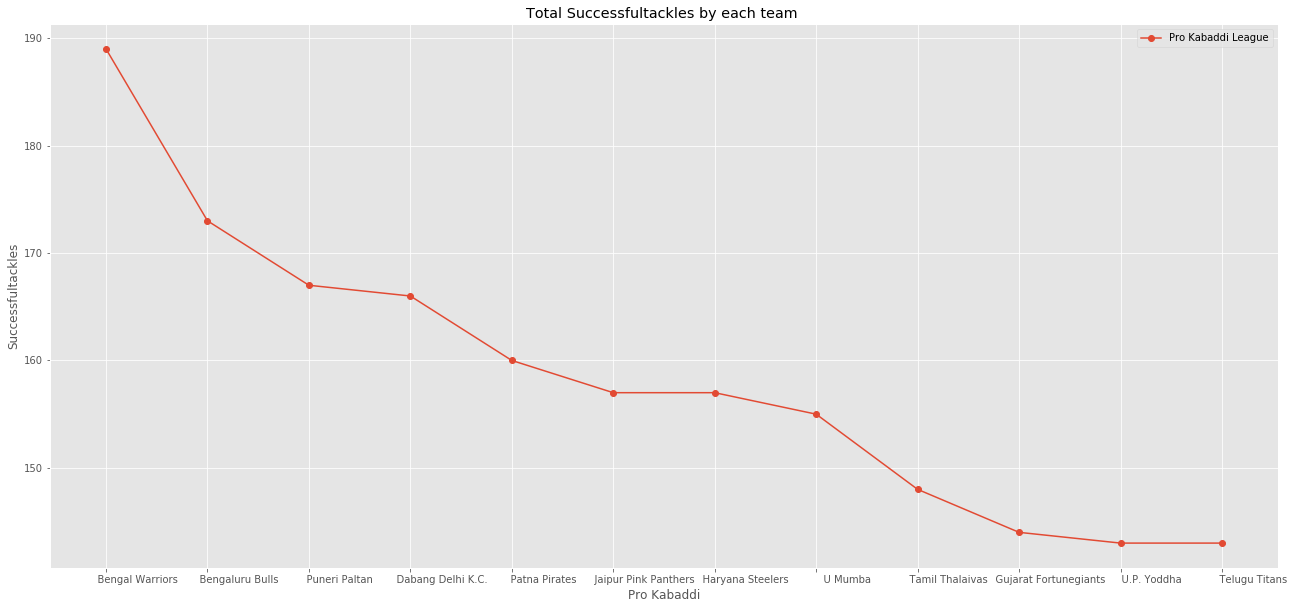

In [261]:
#Plotting Successfultackles scored 
fig = plt.figure(figsize=(22, 10))
plt.title("Total Successfultackles by each team ")
plt.xticks(range(len(teamDetails)),teamDetails.TeamName)
plt.style.use('ggplot')
plt.xlabel("Pro Kabaddi")
plt.ylabel("Successfultackles")
num_Of_teams = range(len(teamDetails))
plt.plot(num_Of_teams,teamDetails.Successfultackles.values,label = "Pro Kabaddi League", marker = 'o')
plt.legend()

### Above Plot shows that Top five Teams on the basis of Succesful Tackles:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

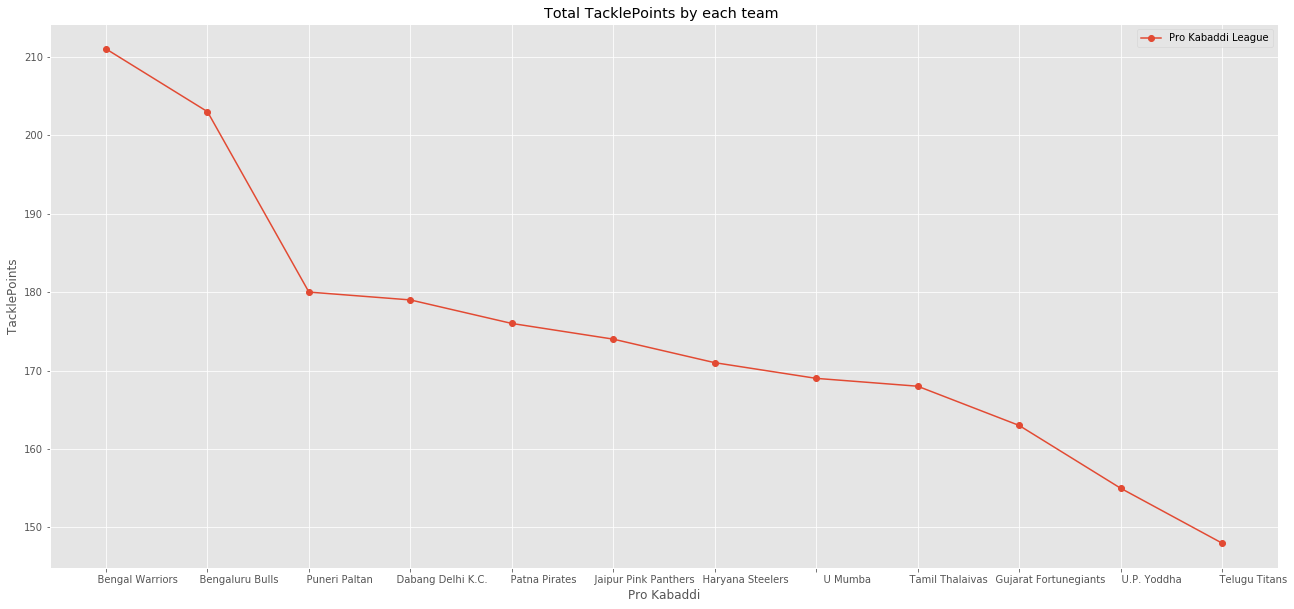

In [262]:
#Plotting TacklePoints scored 
fig = plt.figure(figsize=(22, 10))
plt.title("Total TacklePoints by each team ")
plt.xticks(range(len(teamDetails)),teamDetails.TeamName)
plt.style.use('ggplot')
plt.xlabel("Pro Kabaddi")
plt.ylabel("TacklePoints")
num_Of_teams = range(len(teamDetails))
plt.plot(num_Of_teams,teamDetails.TacklePoints.values,label = "Pro Kabaddi League", marker = 'o')
plt.legend()

### Above Plot shows that Top five Teams on the basis of Tackle Points:
Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000068C18E3B38>,
      dtype=object)

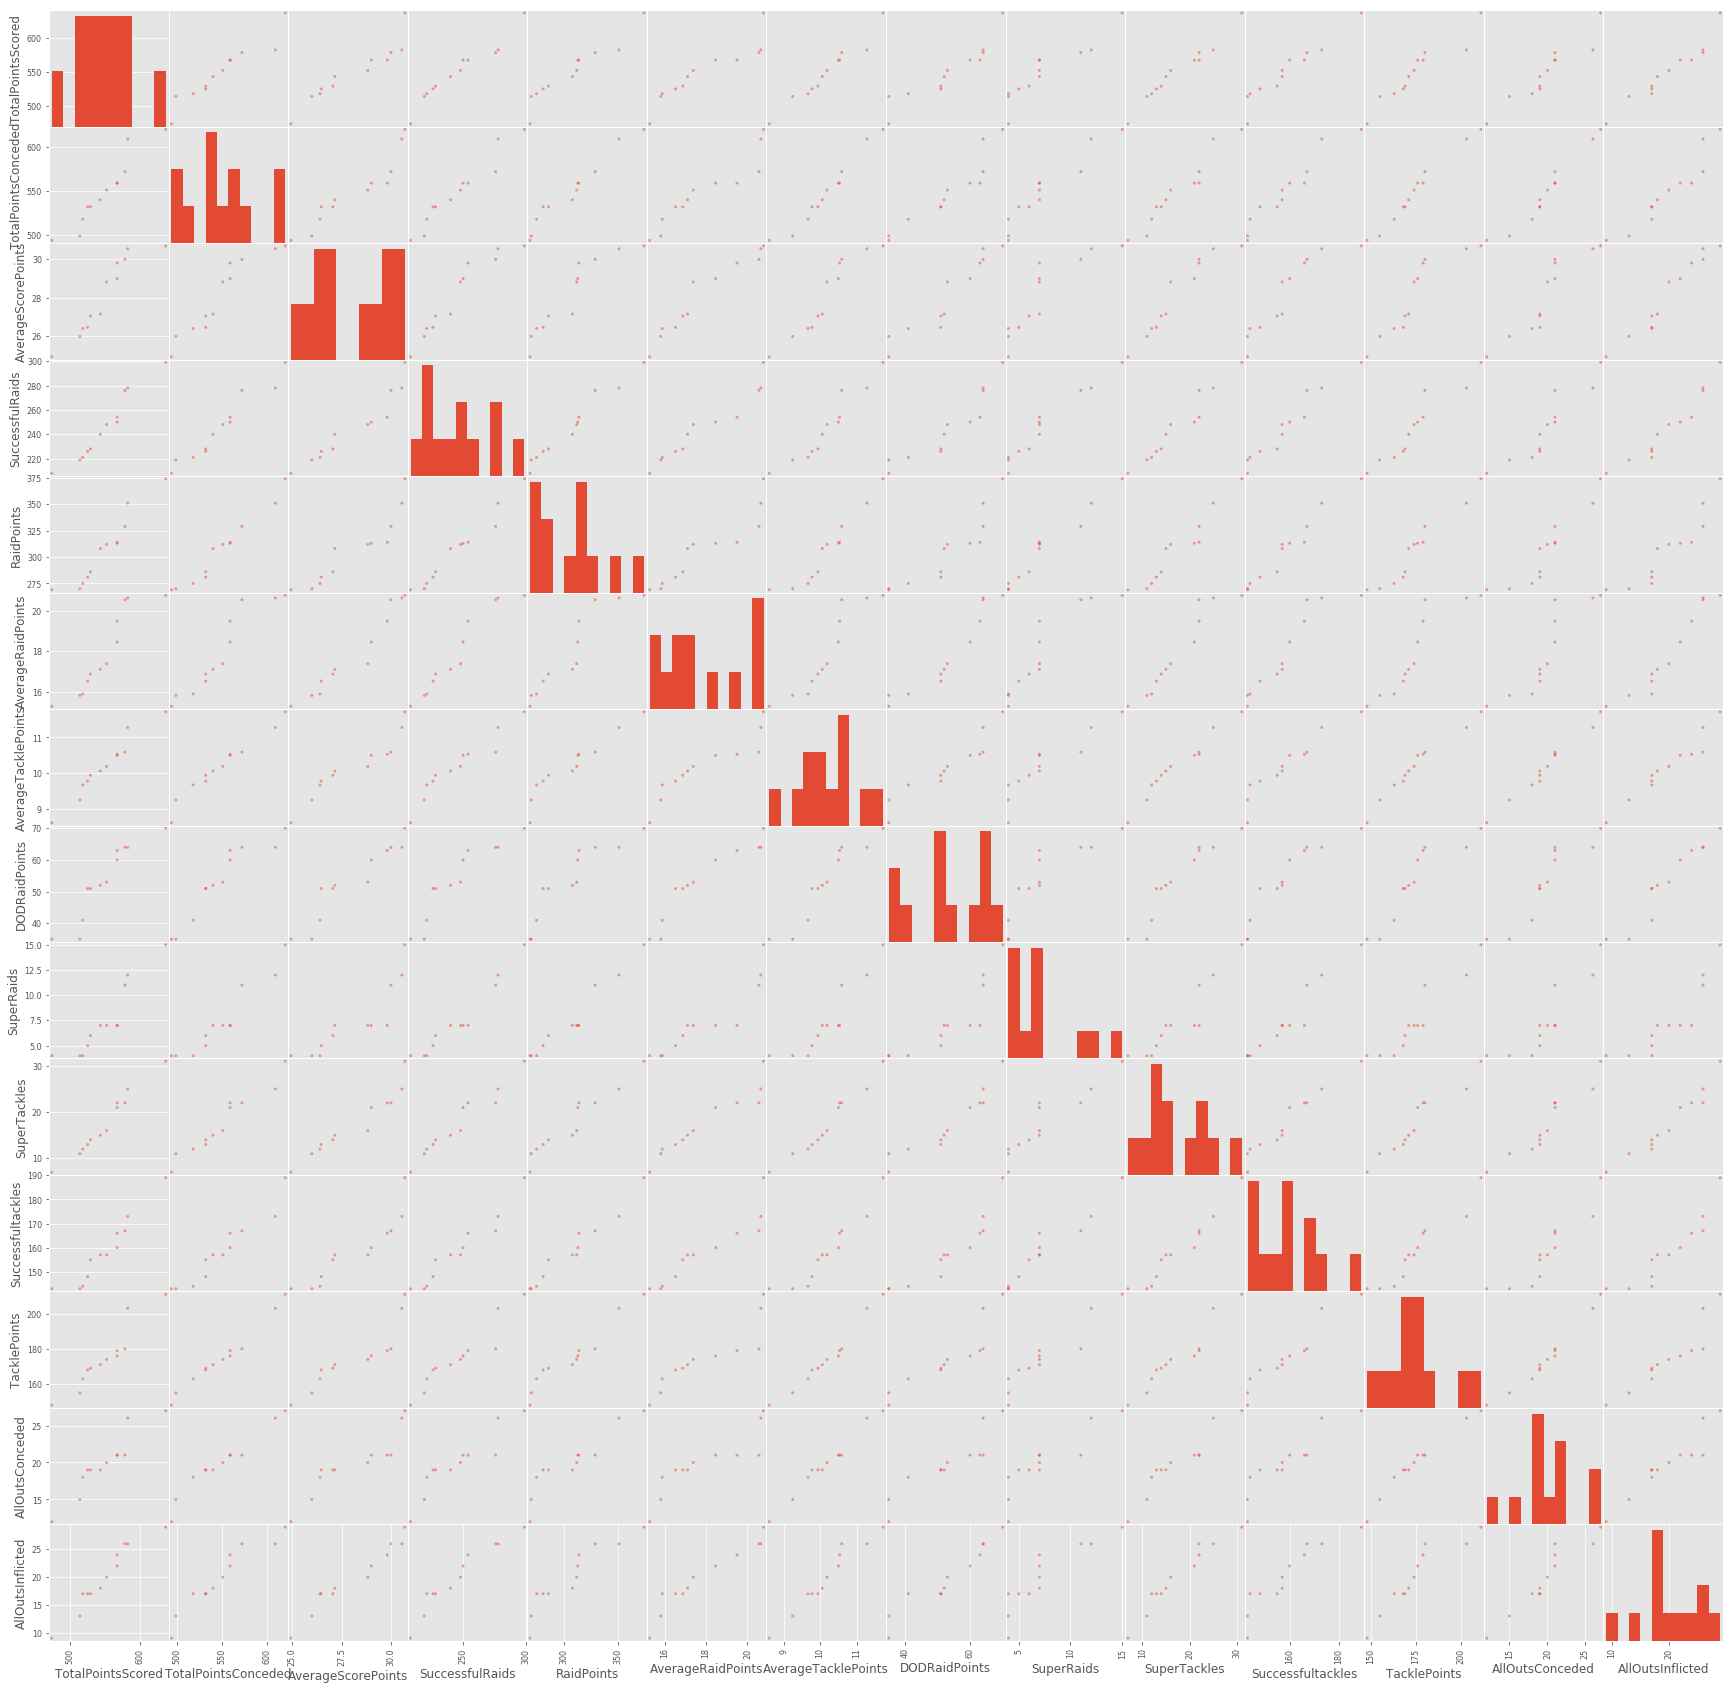

In [263]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

scatter_matrix(teamDetails[['TotalPointsScored','TotalPointsConceded', 'AverageScorePoints', 'SuccessfulRaids','RaidPoints', 'AverageRaidPoints', 'AverageTacklePoints','DODRaidPoints', 'SuperRaids', 'SuperTackles', 'Successfultackles', 'TacklePoints', 'AllOutsConceded', 'AllOutsInflicted']], figsize=(30,30))


In [264]:
#Checking the Team Co-relation table
team_correlation = teamDetails[['TotalPointsScored','TotalPointsConceded', 'AverageScorePoints', 'SuccessfulRaids','RaidPoints', 'AverageRaidPoints', 'AverageTacklePoints','DODRaidPoints', 'SuperRaids', 'SuperTackles', 'Successfultackles', 'TacklePoints', 'AllOutsConceded', 'AllOutsInflicted']].corr()
team_correlation

,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted
TotalPointsScored,1.000000,0.950393,0.934902,0.968115,0.951444,0.916581,0.976135,0.927080,0.918195,0.982149,0.956329,0.944822,0.941888,0.964891
TotalPointsConceded,0.950393,1.000000,0.940201,0.970273,0.978734,0.940500,0.981149,0.936285,0.951371,0.967024,0.961232,0.988523,0.972847,0.951733
AverageScorePoints,0.934902,0.940201,1.000000,0.951785,0.925003,0.967375,0.942698,0.943854,0.870369,0.954427,0.913640,0.901805,0.906934,0.972111
SuccessfulRaids,0.968115,0.970273,0.951785,1.000000,0.983066,0.964421,0.954072,0.921528,0.972936,0.971442,0.968503,0.947181,0.917003,0.958932
RaidPoints,0.951444,0.978734,0.925003,0.983066,1.000000,0.930184,0.951519,0.903684,0.974690,0.959244,0.978546,0.963887,0.921582,0.922205
AverageRaidPoints,0.916581,0.940500,0.967375,0.964421,0.930184,1.000000,0.922425,0.942076,0.916532,0.955705,0.931362,0.901054,0.882108,0.958552
AverageTacklePoints,0.976135,0.981149,0.942698,0.954072,0.951519,0.922425,1.000000,0.940725,0.911018,0.975953,0.947032,0.980126,0.989488,0.971256
DODRaidPoints,0.927080,0.936285,0.943854,0.921528,0.903684,0.942076,0.940725,1.000000,0.858713,0.941247,0.920399,0.897938,0.913861,0.959366
SuperRaids,0.918195,0.951371,0.870369,0.972936,0.974690,0.916532,0.911018,0.858713,1.000000,0.925423,0.963482,0.940950,0.881954,0.885552
SuperTackles,0.982149,0.967024,0.954427,0.971442,0.959244,0.955705,0.975953,0.941247,0.925423,1.000000,0.970457,0.956404,0.942464,0.968519


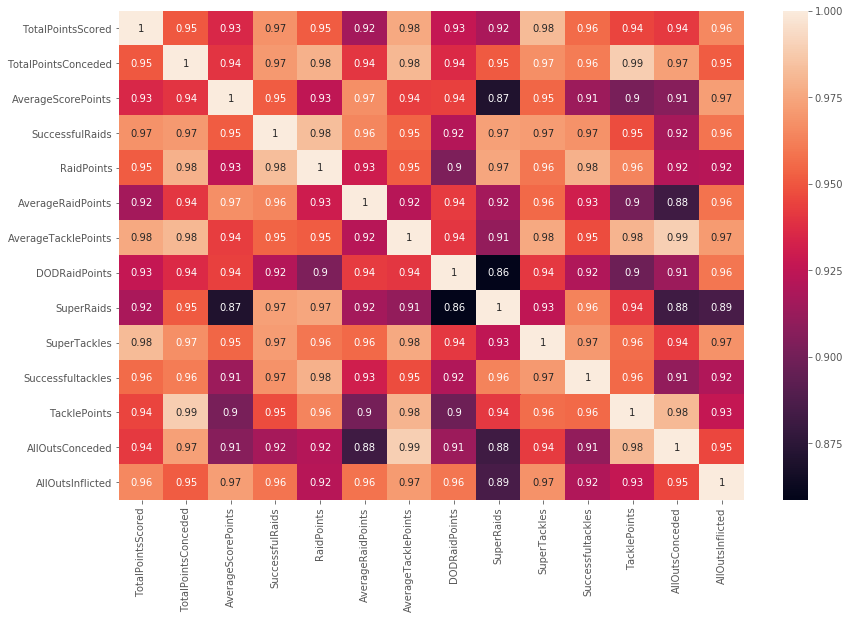

In [265]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(team_correlation, 
            xticklabels=team_correlation.columns.values,
            yticklabels=team_correlation.columns.values,annot= True)
plt.show()

### above heatmap, variables are not highly corelated

In [266]:
# Checking for outliers in the continuous variables
num_columns = teamDetails[['TotalPointsScored','TotalPointsConceded', 'AverageScorePoints', 'SuccessfulRaids','RaidPoints', 'AverageRaidPoints', 'AverageTacklePoints','DODRaidPoints', 'SuperRaids', 'SuperTackles', 'Successfultackles', 'TacklePoints', 'AllOutsConceded', 'AllOutsInflicted']]

In [267]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_columns.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,548.750000,548.750000,28.077500,245.583333,306.833333,17.905000,10.176667,53.250000,7.416667,17.416667,158.500000,174.750000,19.833333,19.833333
std,41.536676,38.751246,1.965781,27.589386,32.992653,2.019215,0.841885,11.600353,3.502164,6.841828,13.780751,17.828093,4.086193,5.828353
min,474.000000,494.000000,24.940000,208.000000,269.000000,15.280000,8.610000,35.000000,4.000000,7.000000,143.000000,148.000000,12.000000,9.000000
25%,523.250000,528.500000,26.455000,224.750000,279.500000,16.370000,9.752500,48.500000,4.750000,12.750000,147.000000,166.750000,18.750000,17.000000
50%,547.500000,545.500000,27.995000,244.000000,310.000000,17.250000,10.125000,52.500000,7.000000,15.500000,157.000000,172.500000,19.500000,19.000000
75%,569.750000,562.250000,29.857500,259.500000,317.750000,19.765000,10.545000,63.250000,8.000000,22.000000,166.250000,179.250000,21.000000,24.500000
90%,581.600000,605.300000,30.495000,277.800000,348.800000,20.641000,11.211000,64.000000,11.900000,24.700000,172.400000,200.700000,25.500000,26.000000
95%,606.300000,613.950000,30.617500,287.450000,361.350000,20.708500,11.478000,66.700000,13.350000,27.700000,180.200000,206.600000,26.450000,27.350000
99%,630.060000,618.790000,30.683500,296.690000,371.470000,20.765700,11.671600,69.340000,14.670000,30.340000,187.240000,210.120000,26.890000,28.670000


In [268]:
num_columns.isnull().sum()

TotalPointsScored      0
TotalPointsConceded    0
AverageScorePoints     0
SuccessfulRaids        0
RaidPoints             0
AverageRaidPoints      0
AverageTacklePoints    0
DODRaidPoints          0
SuperRaids             0
SuperTackles           0
Successfultackles      0
TacklePoints           0
AllOutsConceded        0
AllOutsInflicted       0
dtype: int64

##  Poisson Model

Creating Oppponent and opponent raid points column and copying TeamName and raid points with diffrent sequence into Dataframe

In [269]:
teamDetails['Opponent']=['Bengaluru Bulls','Puneri Paltan','Dabang Delhi K.C.','Patna Pirates','Jaipur Pink Panthers','Haryana Steelers','U Mumba','Tamil Thalaivas','Gujarat Fortunegiants','U.P. Yoddha','Telugu Titans','Bengal Warriors']                            

In [270]:
teamDetails['OpponentRaidPoints']=[278,276,254,250,248,240,228,226,221,219,208,299]

In [271]:
teamDetails.head()

,TeamName,MatchesPlayed,Rank,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted,Opponent,OpponentRaidPoints
0,Bengal Warriors,18,1.0,636,620,30.70,299,374,20.78,11.72,70,15,31,189,211,27,29,Bengaluru Bulls,278
1,Bengaluru Bulls,17,2.0,582,609,30.55,278,351,20.65,11.28,64,12,25,173,203,26,26,Puneri Paltan,276
2,Puneri Paltan,18,3.0,578,572,30.00,276,329,20.56,10.59,64,11,22,167,180,21,26,Dabang Delhi K.C.,254
3,Dabang Delhi K.C.,16,4.0,567,559,29.81,254,314,19.50,10.53,63,7,22,166,179,21,24,Patna Pirates,250
4,Patna Pirates,17,4.0,567,559,29.00,250,313,18.47,10.50,60,7,21,160,176,21,22,Jaipur Pink Panthers,248


In [272]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

raidpoints_model_data = pd.concat([teamDetails[['TeamName','Opponent','RaidPoints']].rename(
            columns={'TeamName':'team', 'Opponent':'opponent','RaidPoints':'raidpoints'}),
           teamDetails[['Opponent','TeamName','OpponentRaidPoints']].rename(
            columns={'TeamName':'team', 'Opponent':'opponent','OpponentRaidPoints':'raidpoints'})])

poisson_model = smf.glm(formula="raidpoints ~ team + opponent", data=raidpoints_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             raidpoints   No. Observations:                   24
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -139.04
Date:                Sat, 28 Sep 2019   Deviance:                       99.331
Time:                        03:05:58   Pearson chi2:                     99.1
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             4.9276      0.011    442.245      0.000       4.906       4.949
team[T.                    Bengaluru Bulls]           0.4101      0.019     21.041      0.000       0.372       0.448
team[T.                    Dabang Delhi K.C.]         0.3572      0.020     17.451      0.000       0.317       0.397
team[T.                    Gujarat Fortunegiants]     0.2909      0.022     13.364      0.000       0.248       0.334
team[T.                    Haryana Steelers]          0.3317      0.021     15.829      0.000       0.291       0.373
team[T.                    Jaipur Pink Panthers]      0.3464      0.021     16.758      0.000       0.306       0.387
team[T.                    Patna Pirates]             0.3545      0.021     17.278      0.000       0.314       0.395
team[T.                    Puneri Paltan]             0.3737      0.020     18.543      0.000       0.334       0.413
team[T.                    Tamil Thalaivas]           0.2989      0.022     13.837      0.000       0.257       0.341
team[T.                    Telugu Titans]             0.7214      0.038     18.981      0.000       0.647       0.796
team[T.                    U Mumba]                   0.3088      0.021     14.425      0.000       0.267       0.351
team[T.                    U.P. Yoddha]               0.2745      0.022     12.415      0.000       0.231       0.318
opponent[T.Bengaluru Bulls]                           0.8593      0.036     24.071      0.000       0.789       0.929
opponent[T.Dabang Delhi K.C.]                         0.3737      0.020     18.543      0.000       0.334       0.413
opponent[T.Gujarat Fortunegiants]                     0.2989      0.022     13.837      0.000       0.257       0.341
opponent[T.Haryana Steelers]                          0.3464      0.021     16.758      0.000       0.306       0.387
opponent[T.Jaipur Pink Panthers]                      0.3545      0.021     17.278      0.000       0.314       0.395
opponent[T.Patna Pirates]                             0.3572      0.020     17.451      0.000       0.317       0.397
opponent[T.Puneri Paltan]                             0.4101      0.019     21.041      0.000       0.372       0.448
opponent[T.Tamil Thalaivas]                           0.3088      0.021     14.425      0.000       0.267       0.351
opponent[T.Telugu Titans]                             0.2745      0.022     12.415      0.000       0.231       0.318
opponent[T.U Mumba]                                   0.3317      0.021     15.829      0.000       0.291       0.373
opponent[T.U.P. Yoddha]                               0.2909      0.022     13.364      0.000       0.248       0.334
==============================================================================================

### As per above Statistics Bengal Warriors (T) and Bengaluru Bulls are pretty close with the scores as per the Raid Points Scored and using z-score

## Logistics Regression

In [273]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = teamDetails.drop(['TeamName','Opponent','Rank','OpponentRaidPoints'],axis=1)

X.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 15 columns):
MatchesPlayed          12 non-null int64
TotalPointsScored      12 non-null int64
TotalPointsConceded    12 non-null int64
AverageScorePoints     12 non-null float64
SuccessfulRaids        12 non-null int64
RaidPoints             12 non-null int64
AverageRaidPoints      12 non-null float64
AverageTacklePoints    12 non-null float64
DODRaidPoints          12 non-null int64
SuperRaids             12 non-null int64
SuperTackles           12 non-null int64
Successfultackles      12 non-null int64
TacklePoints           12 non-null int64
AllOutsConceded        12 non-null int64
AllOutsInflicted       12 non-null int64
dtypes: float64(3), int64(12)
memory usage: 1.5 KB


In [274]:
# Putting response variable to y
y = teamDetails['Rank']

y.head()


0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
Name: Rank, dtype: float64

In [275]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [276]:
from sklearn.preprocessing import StandardScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = StandardScaler()

num_vars=['TotalPointsScored','TotalPointsConceded', 'AverageScorePoints', 'SuccessfulRaids','RaidPoints', 'AverageRaidPoints', 'AverageTacklePoints','DODRaidPoints', 'SuperRaids', 'SuperTackles', 'Successfultackles', 'TacklePoints', 'AllOutsConceded', 'AllOutsInflicted']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train

,MatchesPlayed,TotalPointsScored,TotalPointsConceded,AverageScorePoints,SuccessfulRaids,RaidPoints,AverageRaidPoints,AverageTacklePoints,DODRaidPoints,SuperRaids,SuperTackles,Successfultackles,TacklePoints,AllOutsConceded,AllOutsInflicted
4,17,0.397262,0.341820,0.500047,0.173058,0.254298,0.245047,0.434598,0.517960,-0.105085,0.465864,0.078031,0.154715,0.388623,0.373267
2,18,0.636707,0.680385,0.998847,1.072960,0.732978,1.284942,0.536193,0.842955,1.015826,0.603897,0.563558,0.379755,0.388623,1.001928
0,18,1.899237,1.930470,1.348007,1.869027,2.079264,1.394405,1.811767,1.330446,2.136737,1.846200,2.089499,2.123813,1.823538,1.473423
10,17,-0.756430,-1.220786,-0.996353,-0.899902,-1.032153,-1.073480,-0.976435,-1.513256,-0.945769,-0.914473,-1.101105,-1.026744,-1.046292,-1.041219
7,17,-0.429913,-0.361353,-0.467625,-0.588397,-0.553473,-0.546069,-0.197545,-0.213278,-0.385313,-0.500372,-0.268774,-0.239105,-0.089682,-0.412559
3,16,0.397262,0.341820,0.904075,0.311504,0.284216,0.757531,0.468463,0.761706,-0.105085,0.603897,0.494197,0.323495,0.388623,0.687598
11,16,-1.627140,-1.351003,-1.525081,-1.280630,-1.062070,-1.342161,-1.698885,-1.513256,-0.945769,-1.466608,-1.101105,-1.420564,-1.763750,-1.669880
8,18,-0.516984,-0.361353,-0.761917,-0.657621,-0.703060,-0.720214,-0.378157,-0.213278,-0.665541,-0.638406,-0.754301,-0.295365,-0.089682,-0.412559


In [277]:
import statsmodels.api as sm

In [278]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [279]:
# Logistic regression model
logm1 = sm.GLM(y_train.astype(float),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Rank   No. Observations:                    8
Model:                            GLM   Df Residuals:                        0
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 28 Sep 2019   Deviance:                          nan
Time:                        03:06:08   Pearson chi2:                 1.60e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.073e+16   2.03e+07   1.02e+09      0.000    2.07e+16    2.07e+16
MatchesPlayed        1.428e+17   1.79e+06   7.98e+10      0.000    1.43e+17    1.43e+17
TotalPointsScored   -2.931e+17   5.77e+07  -5.08e+09      0.000   -2.93e+17   -2.93e+17
TotalPointsConceded -4.104e+17   8.19e+07  -5.01e+09      0.000    -4.1e+17    -4.1e+17
AverageScorePoints  -7.855e+17   1.16e+08  -6.78e+09      0.000   -7.85e+17   -7.85e+17
SuccessfulRaids      1.419e+17   8.57e+07   1.66e+09      0.000    1.42e+17    1.42e+17
RaidPoints          -4.338e+17   1.02e+08  -4.26e+09      0.000   -4.34e+17   -4.34e+17
AverageRaidPoints    3.509e+17   1.03e+08    3.4e+09      0.000    3.51e+17    3.51e+17
AverageTacklePoints -8.345e+17   1.62e+08  -5.14e+09      0.000   -8.35e+17   -8.35e+17
DODRaidPoints       -7.932e+17   8.65e+07  -9.17e+09      0.000   -7.93e+17   -7.93e+17
SuperRaids          -5.819e+17   1.51e+08  -3.85e+09      0.000   -5.82e+17   -5.82e+17
SuperTackles        -2.216e+17    7.6e+07  -2.91e+09      0.000   -2.22e+17   -2.22e+17
Successfultackles    4.456e+17   1.19e+08   3.74e+09      0.000    4.46e+17    4.46e+17
TacklePoints         1.303e+18   2.03e+08   6.42e+09      0.000     1.3e+18     1.3e+18
AllOutsConceded     -4.332e+16    5.1e+07   -8.5e+08      0.000   -4.33e+16   -4.33e+16
AllOutsInflicted     3.831e+17   1.12e+08   3.41e+09      0.000    3.83e+17    3.83e+17
=======================================================================================
"""

In [280]:
#Feature Selection
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [281]:
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [282]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MatchesPlayed', False, 3),
 ('TotalPointsScored', False, 2),
 ('TotalPointsConceded', False, 4),
 ('AverageScorePoints', True, 1),
 ('SuccessfulRaids', True, 1),
 ('RaidPoints', True, 1),
 ('AverageRaidPoints', True, 1),
 ('AverageTacklePoints', True, 1),
 ('DODRaidPoints', True, 1),
 ('SuperRaids', True, 1),
 ('SuperTackles', True, 1),
 ('Successfultackles', True, 1),
 ('TacklePoints', True, 1),
 ('AllOutsConceded', True, 1),
 ('AllOutsInflicted', True, 1)]

In [283]:
col = X_train.columns[rfe.support_]

In [284]:
X_train.columns[~rfe.support_]

Index(['MatchesPlayed', 'TotalPointsScored', 'TotalPointsConceded'], dtype='object')

In [285]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Rank   No. Observations:                    8
Model:                            GLM   Df Residuals:                        0
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 28 Sep 2019   Deviance:                          nan
Time:                        03:06:09   Pearson chi2:                 1.60e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.466e+18   2.37e+07   1.04e+11      0.000    2.47e+18    2.47e+18
AverageScorePoints  -9.195e+17   1.26e+08  -7.31e+09      0.000   -9.19e+17   -9.19e+17
SuccessfulRaids      1.897e+17   8.99e+07   2.11e+09      0.000     1.9e+17     1.9e+17
RaidPoints          -6.538e+17   1.34e+08  -4.88e+09      0.000   -6.54e+17   -6.54e+17
AverageRaidPoints    4.025e+17   1.09e+08   3.69e+09      0.000    4.03e+17    4.03e+17
AverageTacklePoints  -8.97e+17   1.73e+08  -5.18e+09      0.000   -8.97e+17   -8.97e+17
DODRaidPoints       -8.793e+17   1.15e+08  -7.67e+09      0.000   -8.79e+17   -8.79e+17
SuperRaids          -4.714e+17    1.5e+08  -3.15e+09      0.000   -4.71e+17   -4.71e+17
SuperTackles        -4.533e+17   9.11e+07  -4.98e+09      0.000   -4.53e+17   -4.53e+17
Successfultackles    2.529e+17   1.34e+08   1.88e+09      0.000    2.53e+17    2.53e+17
TacklePoints          1.26e+18   2.02e+08   6.25e+09      0.000    1.26e+18    1.26e+18
AllOutsConceded     -2.288e+16   5.13e+07  -4.46e+08      0.000   -2.29e+16   -2.29e+16
AllOutsInflicted     4.701e+17    1.1e+08   4.26e+09      0.000     4.7e+17     4.7e+17
=======================================================================================
"""

### above statistics shows that all the  variables for calculating Points are prominent to predict the winner 

## Task6: Predict the player with the highest SUCCESSFUL RAID percentage

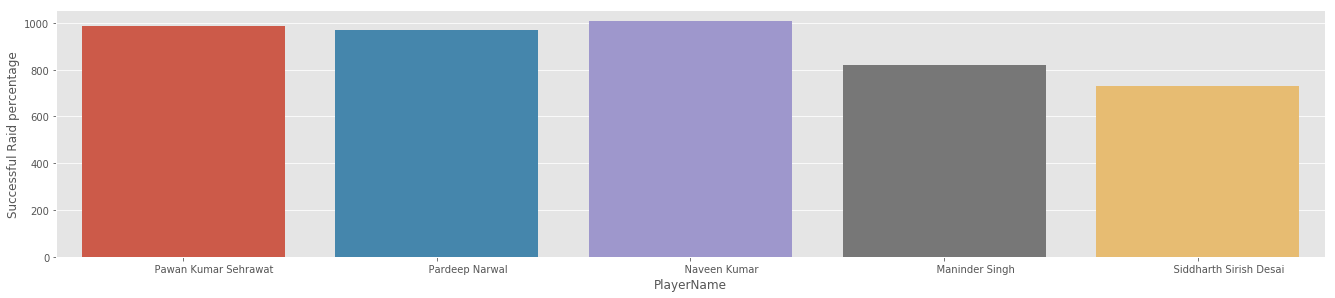

In [286]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)

a=sns.barplot(x=playerDetails['PlayerName'].iloc[:5], y=((playerDetails['SuccessfulRaidPoints'].values/playerDetails['MatchesPlayed'].values)*100))
a.set_ylabel('Successful Raid percentage')
plt.show()

### Above Plot Shows Naveen Kumar with the highest  successful raid Percentage

### Task 7 :Predict the player with the highest SUCCESSFUL TACKLES percentage

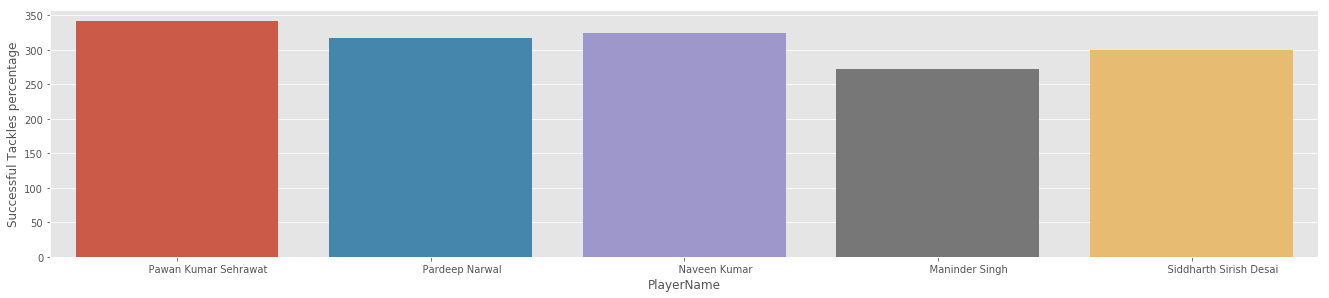

In [287]:
plt.figure(figsize=(50,10))
plt.subplot(2, 2, 1)

a=sns.barplot(x=playerDetails['PlayerName'].iloc[:5], y=((playerDetails['SuccessfulTackles'].values/playerDetails['MatchesPlayed'].values)*100))
a.set_ylabel('Successful Tackles percentage')
plt.show()

### Above Plot Shows Pawan Kumar Sehrawat with the highest  successful tackles Percentage

Conclusion:-
---------

Using EDA , Poisson Model and Logistics Regression on all the prominent variables 

Task 1: -
--------
the winner would be :-Bengal Warriors
---------

Task 2 :-
---------
The top team in the points table after the completion of league matches:- Bengal Warriors
----------

Task 3 :-
------------
The team with the highest points for successful raids:-Bengal Warriors
----------

Task 4 :-
----------
The team with the highest points for successful tackles--Bengal Warriors
-----------

Task 5:-
---
the team with the highest super-performance total:-Bengal Warriors
------------------

Task 6:-
--------
The player with the highest SUCCESSFUL RAID percentage:-Naveen Kumar
-----
Task 7:-
------
The Player with the highest SUCCESSFUL TACKLE percentage:-Pawan Kumar Sehrawat
-------



Other Predictions:-
------

Top 5 Teams
----------

Bengal Warriors

Bengaluru Bulls

Puneri Paltan

Dabang Delhi

Patna Pirates


------------
Raid Percentage between Naveen Kumar and Pawan Kumar Sehrawat is quite close.


